# Stanford CME 241 (Winter 2026) - Assignment 3

**Due: Friday, February 27 @ 11:59 PM PST on Gradescope.**

Assignment instructions:
- Make sure each of the subquestions have answers
- Ensure that group members indicate which problems they're in charge of
- Show work and walk through your thought process where applicable
- Empty code blocks are for your use, so feel free to create more under each section as needed
- Document code with light comments (i.e. 'this function handles visualization')

Submission instructions:
- When complete, fill out your publicly available GitHub repo file URL and group members below, then export or print this .ipynb file to PDF and upload the PDF to Gradescope.

*Link to this ipynb file in your public GitHub repo (replace below URL with yours):* 

https://github.com/ward-benjamin/CME241_RL/blob/master/homeworks/assignment3.ipynb

*Group members (replace below names with people in your group):* 
- Benjamin Ward

## Imports

In [6]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import minimize_scalar
from typing import Iterable, Iterator, Mapping, TypeVar, Callable, Sequence, Tuple, Dict
from rl.distribution import Categorical
from rl.markov_process import FiniteMarkovRewardProcess
from rl.chapter10.prediction_utils import compare_td_and_mc
X = TypeVar('X')
S = TypeVar('S')

## Question 1: Milk Vendor Optimization Problem (Led by Benjamin Ward)

You are a milk vendor and your task is to bring to your store a supply (denoted $S \in \mathbb{R}$) of milk volume in the morning that will give you the best profits. You know that the demand for milk throughout the course of the day is a probability distribution function $f$ (for mathematical convenience, assume people can buy milk in volumes that are real numbers, hence milk demand $x \in \mathbb{R}$ is a continuous variable with a probability density function). 

For every extra gallon of milk you carry at the end of the day (supply $S$ exceeds random demand $x$), you incur a cost of $h$ (effectively the wasteful purchases amounting to the difference between your purchase price and the end-of-day discount disposal price since you are not allowed to sell the same milk the next day). For every gallon of milk that a customer demands that you don’t carry (random demand $x$ exceeds supply $S$), you incur a cost of $p$ (effectively the missed sales revenue amounting to the difference between your sales price and purchase price). 

Your task is to identify the optimal supply $S$ that minimizes your **Expected Cost** $g(S)$, given by:

$$
g_1(S) = \mathbb{E}[\max(x - S, 0)] = \int_{S}^{\infty} (x - S) \cdot f(x) \, dx
$$

$$
g_2(S) = \mathbb{E}[\max(S - x, 0)] = \int_{-\infty}^{S} (S - x) \cdot f(x) \, dx
$$

$$
g(S) = p \cdot g_1(S) + h \cdot g_2(S)
$$

---

### Part (A): Analytical Optimization

1. **Derive the first-order condition (FOC)** for minimizing the expected cost $g(S)$.
2. **Solve the FOC** to express the optimal supply $S^*$ in terms of the given parameters: $p$, $h$, and the demand distribution $f(x)$. (*Hint*: Pay attention to the balance between the costs of overstocking and understocking)

3. **Interpretation**: Provide an interpretation of the condition you derived. What does the balance between $p$ and $h$ imply about the optimal supply $S^*$?

---

### Part (B): Special Case Analysis

1. Consider the case where the demand $x$ follows an **exponential distribution** with parameter $\lambda > 0$. That is, $f(x) = \lambda e^{-\lambda x}$ for $x \geq 0$.
    - Derive an explicit expression for the optimal supply $S^*$.
    
2. Consider the case where the demand $x$ follows a **normal distribution** with mean $\mu$ and variance $\sigma^2$, i.e., $x \sim \mathcal{N}(\mu, \sigma^2)$. 
    - Set up the integral for $g(S)$ and describe how it relates to the **cumulative distribution function (CDF)** of the normal distribution.
    - Provide an interpretation of how changes in $\mu$ and $\sigma$ influence the optimal $S^*$. 

---

### Part (C): Framing as a Financial Options Problem

1. Frame the milk vendor’s problem as a **portfolio of call and put options**:
    - Identify the analog of the “strike price” and “underlying asset.”
    - Explain which part of the cost function $g_1(S)$ or $g_2(S)$ corresponds to a call option and which part to a put option.
    - What do $p$ and $h$ represent in this options framework?

2. Explain how this framing could be used to derive the optimal supply $S^*$ if solved using financial engineering concepts.

---

### Part (D): Numerical Solution and Simulation

1. **Numerical Solution**: Write a Python function that numerically estimates the optimal $S^*$ using an iterative search or numerical optimization method. 

2. **Simulation**: Generate random samples of milk demand from an exponential distribution and simulate the total costs for different values of $S$. Plot the costs against $S$ and visually identify the optimal $S$.

### Part (A) Answer

1. Let's first note that since $f$ is a density, if we note $F$ its primitive, then $F(-\infty)=0$ and $F(+\infty)=1$. We then have using Leibniz's rule:
\begin{align}
g(S)&=pg_1(S)+hg_2(S)= p\int_{S}^{\infty} (x - S) \cdot f(x) \, dx + h\int_{-\infty}^{S} (S - x) \cdot f(x) \, dx \\
\Rightarrow g'(S)&=p(0+0+\int_S^{\infty}(-f(x))\, dx) + h(0 + 0 + \int_{-\infty}^S f(x)\, dx) \\
&= -p(F(+\infty)-F(S))+h(F(S)-F(-\infty)) \\
&= -p+(p+h)F(S)
\end{align}
So the FOC for minimizing the expected cost $g(S)$, that is $g'(S)=0$ can be written as $-p+(p+h)F(S)=0$.

2. In 1. we found the optimal supply $S^*$ must satisfy the FOC $-p+(p+h)F(S^*)=0$, therefore $S^*=F^{-1}(\frac{p}{p+h})$ where $F(S)=\int_{-\infty}^Sf(x)\,dx$.

3. In 2, we found that $S^*$ must satisfy $F(S^*)=\frac{p}{p+h}$. In words, this means that we choose $S^*$ such that the probability that demand is less than or equal to $S^*$ is equal to $\frac{p}{p+h}$. If $p$ is high (cost of "missed" sales), then we increase the supply of milk we bring to the store, which makes intuitive sense. If $h$ is high (cost of holding inventory), then we reduce the supply of milk we bring to the store, which also makes intuitive sense.

### Part (B) Answer

1. In Part (A), we found that the optimal supply $S^*$ satisfies $F(S^*)=\frac{p}{p+h}$. For an exponential distribution of parameter $\lambda>0$, we have $F(S)=\int_{0}^S \lambda e^{-\lambda x}dx=1-e^{-\lambda S}$, such that we now have $1-e^{-\lambda S^*}=\frac{p}{p+h}$, so:
\begin{align}
e^{-\lambda S^*} &= 1-\frac{p}{p+h} \\
&= \frac{h}{h+p} \\
\Rightarrow S^* &= \frac{1}{-\lambda}\log(\frac{h}{h+p}) \\
&= \frac{1}{\lambda}\log(\frac{h+p}{h})
\end{align}

2. Suppose that $x\sim \mathcal{N}(\mu,\sigma^2)$. We note $\phi_{\mu,\sigma}$ the PDF and $\Phi_{\mu,\sigma}$ the CDF. To lighten notations we note $\phi$ and $\Phi$ the corresponding PDF and CDF for the standard normal. Then using the formula given for $g(S)$:
\begin{align}
g(S)&= p\int_{S}^{\infty} (x - S) \cdot f(x) \, dx + h\int_{-\infty}^{S} (S - x) \cdot f(x) \, dx \\
&= p\int_{S}^{\infty} (x - S) \cdot \phi_{\mu,\sigma}(x) \, dx + h\int_{-\infty}^{S} (S - x) \cdot \phi_{\mu,\sigma}(x) \, dx
\end{align}
Let's get back to our implicit equation for $S^*$, namely $F(S^*)=\frac{p}{p+h}$. Since $x\sim \mathcal{N}(\mu,\sigma^2)$, then $F(S)=\Phi(\frac{S-\mu}{\sigma})$, such that our equation becomes:
\begin{align}
\Phi(\frac{S^*-\mu}{\sigma}) &= \frac{p}{p+h} \\
\Rightarrow S^* &= \mu + \sigma\Phi^{-1}(\frac{p}{p+h})
\end{align}
This means that for every unit of increase in $\mu$, the optimal supply $S^*$ increase by one unit. 
Further, for every one unit increase in $\sigma$, $S^*$ increase by $\Phi^{-1}(\frac{p}{p+h})$. We have 3 cases. 
- First if $p<h$, then $\frac{p}{p+h}<1/2$, so $\Phi^{-1}(\frac{p}{p+h})<0$, so an increase in $\sigma$ leads to a decrease in the optimal $S^*$. 
- Second if $p=h$, then $\frac{p}{p+h}=1/2$, so $\Phi^{-1}(\frac{p}{p+h})=0$, so $S^*$ is independent of $\sigma$. 
- Third if $p>h$, then $\frac{p}{p+h}>1/2$, so $\Phi^{-1}(\frac{p}{p+h})>0$, so an increase in $\sigma$ leads to an increase in the optimal $S^*$.

### Part (C) Answer

1. We notice that $g_1(S) = \mathbb{E}[\max(x - S, 0)]$ which is the payoff of a call with underlying asset x and strike price S, and similarly $g_2(S) = \mathbb{E}[\max(S - x, 0)]$ is the payoff of a put with underlying asset x and strike price S. So  $g(S) = p \cdot g_1(S) + h \cdot g_2(S)$ is the payoff of a portfolio consisting of $p$ units of the previously described call, and $h$ units of the previously described put. Since we want to minimize $g(S)$, our "actual" portfolio is "opposite", namely we are short $p$ units of the call and short $h$ units of the put.

2. We computed the expression for the optimal supply $S^*$ in Part (A) using the FOC for $g(S)$, which can be re-written as:
\begin{align}
pg_1'(S^*)&=-hg_2'(S^*) \\
\Rightarrow p(1-F(S^*))&= hF(S^*) \\
\Rightarrow p\mathbb{P}(x>S^*) &= hP(x\leq S^*)
\end{align} 
This means that us (we are selling the put and the calls), choose $S^*$ such that the probability of the call finishing in the money is equal to the probability of the put finishing in the money, weighted by our exposure (number of units of calls and puts we sold).

### Part (D) Answer

In [7]:
'''
fill in the code below, and then run the code in the next cell for the simulation
'''

# simulation parameters
p = 5  # Cost of understocking (per unit)
h = 2  # Cost of overstocking (per unit)
lambda_param = 1.0  # Parameter for exponential distribution

# Probability density function for demand
def demand_pdf(x):
    return lambda_param * np.exp(-lambda_param*x)

# Cumulative distribution function for demand
def demand_cdf(x):
    return max(0,1-np.exp(-lambda_param*x))

# Expected cost function g(S)
def expected_cost(S):
    # g1(S): Understocking cost
    g1 = p*(np.exp(-lambda_param*S)/lambda_param)
    
    # g2(S): Overstocking cost (integral using CDF)
    g2 = h*(S-(1/lambda_param)*np.exp(-lambda_param*S)/lambda_param)
    
    return g1 + g2

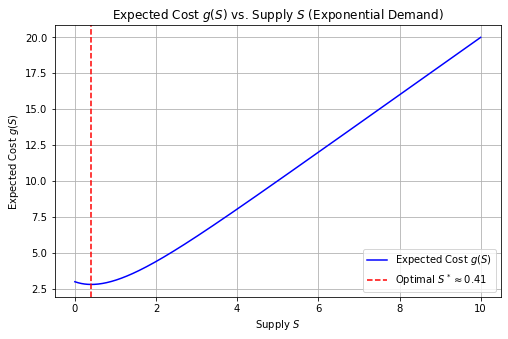

np.float64(0.4054660494382044)

In [8]:
result = minimize_scalar(expected_cost, bounds=(0, 10), method='bounded')
optimal_S = result.x

# Simulation of costs
S_values = np.linspace(0, 10, 500)
costs = [expected_cost(S) for S in S_values]

# Plotting the costs against S
plt.figure(figsize=(8, 5))
plt.plot(S_values, costs, label="Expected Cost $g(S)$", color='blue')
plt.axvline(optimal_S, color='red', linestyle='--', label=f"Optimal $S^* \\approx {optimal_S:.2f}$")
plt.xlabel("Supply $S$")
plt.ylabel("Expected Cost $g(S)$")
plt.title("Expected Cost $g(S)$ vs. Supply $S$ (Exponential Demand)")
plt.legend()
plt.grid(True)
plt.show()

optimal_S

## Question 2: Car Sales (Led By: Benjamin Ward)

You must sell your car within a finite window of $N$ days. At the beginning of each day $t \in \{1, \dots, N\}$, you receive a single offer $X_t$ from a dealership, where $\{X_t\}$ are i.i.d. draws from a known continuous distribution $Q$ supported on $[m, M]$, with $0 < m < M$.

After observing $X_t$, you must immediately choose whether to **accept** or **reject** the offer:

- If you **accept** on day $t$, you sell the car immediately and receive payoff $X_t$. The process then terminates.
- If you **reject** on day $t < N$, you keep the car, pay a parking cost $c \ge 0$ at the end of that day, and proceed to day $t+1$.
- On day $N$, you must accept the offer (i.e., rejecting is not allowed).

Your objective is to maximize the expected **net payoff**, defined as the sale price minus the total parking costs paid before the sale.

---

### Part (A): MDP Modeling

Model this problem as a finite-horizon **Markov Decision Process (MDP)**. Clearly specify:

1. **States**
2. **Actions**
3. **Rewards**
4. **State-transition probabilities**
5. **Discount factor** (use $\gamma = 1$)

Also state whether this MDP is finite- or infinite-horizon, episodic or continuing, and whether it is time-homogeneous.

---

### Part (B): Structure of the Optimal Policy

Let $V_t$ denote the optimal value function when there are $t$ days remaining (before observing the offer).

1. Write down the Bellman recursion for $V_t$.
2. Show that the optimal policy is a **time-dependent threshold policy**: that is, there exists a reservation price $r_t$ such that it is optimal to accept an offer $x$ if and only if $x \ge r_t$.
3. Express the threshold $r_t$ in terms of $V_{t-1}$ and $c$.

(You may leave expectations with respect to $Q$ written in integral or expectation form. A closed-form solution for general $Q$ is not required.)

---

### Part (C): Special Case (No Integrals)

Now consider the special case where $c = 0$ and $Q = \text{Uniform}[m, M]$.

1. Write the recursion for $V_t$ explicitly.
2. Provide the optimal policy in as closed-form a way as possible. Your policy may depend on recursively defined coefficients, but your final expressions should contain **no integrals**.


### Part (A) Answer

Model this problem as a finite-horizon **Markov Decision Process (MDP)**. Clearly specify:

1. **States**
2. **Actions**
3. **Rewards**
4. **State-transition probabilities**
5. **Discount factor** (use $\gamma = 1$)

Also state whether this MDP is finite- or infinite-horizon, episodic or continuing, and whether it is time-homogeneous.


### Part (B) Answer

Let $V_t$ denote the optimal value function when there are $t$ days remaining (before observing the offer).

1. Write down the Bellman recursion for $V_t$.
2. Show that the optimal policy is a **time-dependent threshold policy**: that is, there exists a reservation price $r_t$ such that it is optimal to accept an offer $x$ if and only if $x \ge r_t$.
3. Express the threshold $r_t$ in terms of $V_{t-1}$ and $c$.

(You may leave expectations with respect to $Q$ written in integral or expectation form. A closed-form solution for general $Q$ is not required.)

### Part (C) Answer

Now consider the special case where $c = 0$ and $Q = \text{Uniform}[m, M]$.

1. Write the recursion for $V_t$ explicitly.
2. Provide the optimal policy in as closed-form a way as possible. Your policy may depend on recursively defined coefficients, but your final expressions should contain **no integrals**.

## Question 3: Constrained Consumption (Led By: Benjamin Ward)

Consider the following discrete-time MDP for constrained consumption. At $t = 0$, the agent is given a finite amount $x_0 \in \mathbb{R}^+$ of a resource. In each time period, the agent can choose to consume any amount of the resource, with the consumption denoted as $c \in [0, x]$ where $x$ is the amount of the resource remaining at the start of the time period. This consumption results in a reduction of the resource at the start of the next time period:  
$$x' = x - c.$$  

Consuming a quantity $c$ of the resource provides a utility of consumption equal to $U(c)$, and we adopt the **CRRA utility function**:  
$$
U(c) = \frac{c^{1 - \gamma}}{1 - \gamma}, \quad (\gamma > 0, \gamma \neq 1)
$$

Our goal is to maximize the aggregate discounted utility of consumption until the resource is completely consumed. We assume a discount factor of $\beta \in (0, 1)$ when discounting the utility of consumption over any single time period. Assume parameters are such that the value function is finite.

We model this as a **discrete-time, continuous-state-space, continuous-action-space, stationary, deterministic MDP**, and so our goal is to solve for the **Optimal Value Function** and associated **Optimal Policy**, which will give us the optimal consumption trajectory of the resource. Since this is a stationary MDP, the **State** is simply the amount $x$ of the resource remaining at the start of a time period. The **Action** is the consumption quantity $c$ in that time period. The **Reward** for a time period is $U(c)$ when the consumption in that time period is $c$. The discount factor over each single time period is $\beta$.

We assume that the **Optimal Policy** is given by:  
$$
c^* = \theta^* \cdot x \quad \text{for some } \theta^* \in [0, 1].
$$

---

### Part (A): Closed-form Expression for $V_\theta(x)$

Our first step is to consider a fixed deterministic policy, given by:  
$$c = \theta \cdot x \quad \text{for some fixed } \theta \in [0, 1].$$  
Derive a closed-form expression for the **Value Function** $V_\theta(x)$ for a fixed deterministic policy, given by $c = \theta \cdot x$. Specifically, you need to express $V_\theta(x)$ in terms of $\beta$, $\gamma$, $\theta$, and $x$.

---

### Part (B): Solving for $\theta^*$

Use this closed-form expression for $V_\theta(x)$ to solve for the $\theta^*$ which maximizes $V_\theta(x)$ (thus fetching us the **Optimal Policy** given by $c^* = \theta^* \cdot x$).

---

### Part (C): Expression for $V^*(x)$

Use this expression for $\theta^*$ to obtain an expression for the **Optimal Value Function** $V^*(x)$ in terms of only $\beta$, $\gamma$, and $x$.

---

### Part (D): Validation of the Bellman Equation

Validate that the **Optimal Policy** (derived in part B) and **Optimal Value Function** (derived in part C) satisfy the **Bellman Optimality Equation**.

### Part (A) Answer

<span style="color:red">*fill in*</span>

### Part (B) Answer

<span style="color:red">*fill in*</span>

### Part (C) Answer

<span style="color:red">*fill in*</span>

### Part (D) Answer

<span style="color:red">*fill in*</span>

## Problem 4: Double Q-Learning (Led By: Benjamin Ward)

It is known that **Q-Learning** can suffer from maximization bias during finite-sample training. In this problem, we consider a modification of tabular Q-Learning called **Double Q-Learning**, which reduces this bias by decoupling action selection and evaluation.

---

### **Algorithm 1: Double Q-Learning**

**Initialize** $Q_1(s,a)$ and $Q_2(s,a)$ for all $s \in \mathcal{S}$, $a \in \mathcal{A}$  
**yield** estimate of $Q$

**while** True **do**  
&emsp; **select** initial state $s_0$, set $t = 0$  
&emsp; **while** $s_t$ is non-terminal **do**  

&emsp;&emsp; **select** $a_t$ using $\epsilon$-greedy with respect to  
&emsp;&emsp; $\displaystyle \pi(s) = \arg\max_a \big( Q_1(s,a) + Q_2(s,a) \big)$  

&emsp;&emsp; **observe** $(r_t, s_{t+1})$  

&emsp;&emsp; **with probability 0.5 update $Q_1$:**

&emsp;&emsp;&emsp; Let  
&emsp;&emsp;&emsp; $\displaystyle a^* = \arg\max_a Q_1(s_{t+1}, a)$  

&emsp;&emsp;&emsp; Update  
&emsp;&emsp;&emsp; $\displaystyle 
Q_1(s_t, a_t) \leftarrow Q_1(s_t, a_t)
+ \alpha \Big(
r_t + \gamma Q_2(s_{t+1}, a^*)
- Q_1(s_t, a_t)
\Big)
$

&emsp;&emsp; **otherwise update $Q_2$:**

&emsp;&emsp;&emsp; Let  
&emsp;&emsp;&emsp; $\displaystyle a^* = \arg\max_a Q_2(s_{t+1}, a)$  

&emsp;&emsp;&emsp; Update  
&emsp;&emsp;&emsp; $\displaystyle 
Q_2(s_t, a_t) \leftarrow Q_2(s_t, a_t)
+ \alpha \Big(
r_t + \gamma Q_1(s_{t+1}, a^*)
- Q_2(s_t, a_t)
\Big)
$

&emsp;&emsp; $t \leftarrow t + 1$  
&emsp;&emsp; $s_t \leftarrow s_{t+1}$  

**yield** estimate $Q_1 + Q_2$

---

### **Algorithm 2: Q-Learning**

**Initialize** $Q(s,a)$ for all $s \in \mathcal{S}$, $a \in \mathcal{A}$  
**yield** $Q$

**while** True **do**  
&emsp; **select** initial state $s_0$, set $t = 0$  
&emsp; **while** $s_t$ is non-terminal **do**  

&emsp;&emsp; **select** $a_t$ using $\epsilon$-greedy with respect to  
&emsp;&emsp; $\displaystyle \pi(s) = \arg\max_a Q(s,a)$  

&emsp;&emsp; **observe** $(r_t, s_{t+1})$  

&emsp;&emsp; Update  
&emsp;&emsp; $\displaystyle 
Q(s_t, a_t) \leftarrow Q(s_t, a_t)
+ \alpha \Big(
r_t + \gamma \max_a Q(s_{t+1}, a)
- Q(s_t, a_t)
\Big)
$

&emsp;&emsp; $t \leftarrow t + 1$  
&emsp;&emsp; $s_t \leftarrow s_{t+1}$  

**yield** $Q$

---

### Instructions

The code skeleton for this problem is provided below. Implement the functions:

- `double_q_learning`
- `q_learning`

After running both algorithms, you will obtain a plot of the estimated Q-value versus episode number.

In your writeup:

1. Compare the behavior of Q-Learning and Double Q-Learning.
2. Explain why Q-Learning can exhibit maximization bias.
3. Discuss the advantages and possible drawbacks of Double Q-Learning in general MDPs.


In [ ]:
import random
import numpy as np
import matplotlib.pyplot as plt

from dataclasses import dataclass
from collections import defaultdict
from typing import Mapping, Iterator, TypeVar, Tuple, Dict, Iterable, Generic

# RL imports (adapt or remove if you don't have the same environment):
from rl.distribution import (
    Distribution, Constant, Gaussian, Choose, SampledDistribution, Categorical
)
from rl.markov_process import NonTerminal, State, Terminal
from rl.markov_decision_process import MarkovDecisionProcess
from rl.td import epsilon_greedy_action

S = TypeVar('S')
A = TypeVar('A')

In [ ]:
# -----------------------------------------------------------------------
# Tabular Q-value function approximation (done for you)
# -----------------------------------------------------------------------
class TabularQValueFunctionApprox(Generic[S, A]):
    """
    A basic implementation of a tabular function approximation 
    with constant learning rate of 0.1
    Also tracks the number of updates per (state, action).
    """
    def __init__(self):
        self.counts: Mapping[Tuple[NonTerminal[S], A], int] = defaultdict(int)
        self.values: Mapping[Tuple[NonTerminal[S], A], float] = defaultdict(float)
    
    def update(self, k: Tuple[NonTerminal[S], A], target: float) -> None:
        alpha = 0.1
        old_val = self.values[k]
        self.values[k] = (1 - alpha) * old_val + alpha * target
        self.counts[k] += 1
    
    def __call__(self, x: Tuple[NonTerminal[S], A]) -> float:
        return self.values[x]

In [ ]:
# -----------------------------------------------------------------------
# Double Q-Learning (fill in)
# -----------------------------------------------------------------------
def double_q_learning(
    mdp: MarkovDecisionProcess[S, A],
    states: Distribution[NonTerminal[S]],
    gamma: float
) -> Iterator[TabularQValueFunctionApprox[S, A]]:
    """
    Implements Double Q-Learning as described:
      1) We keep two Q-tables, Q1 and Q2.
      2) We choose actions epsilon-greedily with respect to Q1+Q2.
      3) With 50% chance we update Q1 using next-action chosen by max of Q2,
         otherwise update Q2 using next-action chosen by max of Q1.
    """
    pass

In [ ]:
# -----------------------------------------------------------------------
# Standard Q-Learning (fill in)
# -----------------------------------------------------------------------
def q_learning(
    mdp: MarkovDecisionProcess[S, A],
    states: Distribution[NonTerminal[S]],
    gamma: float
) -> Iterator[TabularQValueFunctionApprox[S, A]]:
    """
    Standard Q-Learning:
      1) Keep one Q table
      2) Epsilon-greedy wrt that table
      3) Update Q((s,a)) with  r + gamma * max_{a'} Q((s_next, a'))
    """
    pass

In [ ]:
# -----------------------------------------------------------------------
# The MDP: States A,B and actions a1,a2,b1,...,bn (don't modify anything anymore, just run to get the graphs)
# -----------------------------------------------------------------------
@dataclass(frozen=True)
class P1State:
    """
    The MDP state, storing whether we are in "A" or "B".
    """
    name: str

class P1MDP(MarkovDecisionProcess[P1State, str]):
    
    def __init__(self, n: int):
        self.n = n

    def actions(self, state: NonTerminal[P1State]) -> Iterable[str]:
        """
        Return the actions available from this state.
          - if state is A => ["a1", "a2"]
          - if state is B => ["b1", ..., "bn"]
        """
        if state.state.name == "A":
            return ["a1", "a2"]
        else:
            return [f"b{i}" for i in range(1, self.n+1)]
    
    def step(
        self,
        state: NonTerminal[P1State],
        action: str
    ) -> Distribution[Tuple[State[P1State], float]]:
        """
        Return the distribution of (next state, reward) from (state, action):
          - A + a1 => reward 0, next state B
          - A + a2 => reward 0, next state terminal
          - B + b_i => reward ~ Normal(-0.1,1), next state terminal
        """
        if state.state.name == "A":
            if action == "a1":
                return Constant((NonTerminal(P1State("B")), 0.0))
            else:
                return Constant((Terminal(P1State("T")), 0.0))
        else:
            # For B + b_i => reward ~ N(-0.1,1), then terminal
            def sampler():
                r = np.random.normal(loc=-0.1, scale=1.0)
                return (Terminal(P1State("T")), r)
            return SampledDistribution(sampler)

def run_double_q_once(mdp, start_dist, gamma=1.0, episodes=400):
    """
    Runs one 'chain' of Double Q-Learning for 'episodes' episodes,
    returning a list of Q-values for Q((A,a1)) at the end of each episode.
    """
    dq_iter = double_q_learning(mdp, start_dist, gamma)  # generator
    vals = []
    for _ in range(episodes):
        Q1 = next(dq_iter)
        # record Q1((A,a1)) each time
        qA1 = Q1((NonTerminal(P1State("A")), "a1"))
        vals.append(qA1)
    return vals

def run_q_once(mdp, start_dist, gamma=1.0, episodes=400):
    """
    Same but for standard Q-Learning
    """
    q_iter = q_learning(mdp, start_dist, gamma)
    vals = []
    for _ in range(episodes):
        Q = next(q_iter)
        qA1 = Q((NonTerminal(P1State("A")), "a1"))
        vals.append(qA1)
    return vals

def main():
    # For reproducibility
    random.seed(0)
    np.random.seed(0)

    n = 10
    mdp = P1MDP(n)
    # Always start in A, as a NonTerminal
    start_dist = Constant(NonTerminal(P1State("A")))

    N_RUNS = 100
    N_EPISODES = 400

    all_dbl = []
    all_std = []

    for _ in range(N_RUNS):
        dbl_vals = run_double_q_once(mdp, start_dist, gamma=1.0, episodes=N_EPISODES)
        std_vals = run_q_once(mdp, start_dist, gamma=1.0, episodes=N_EPISODES)
        all_dbl.append(dbl_vals)
        all_std.append(std_vals)

    arr_dbl = np.array(all_dbl)
    arr_std = np.array(all_std)

    avg_dbl = np.mean(arr_dbl, axis=0)
    avg_std = np.mean(arr_std, axis=0)

    plt.figure(figsize=(8,6))
    plt.plot(avg_dbl, label='Double Q-Learning: Q(A,a1)')
    plt.plot(avg_std, label='Q-Learning: Q(A,a1)')
    plt.xlabel('Episode')
    plt.ylabel('Estimated Q-value')
    plt.title('Average Q(A,a1) over 100 runs, n=10')
    plt.legend()
    plt.grid(True)
    plt.show()

if __name__ == "__main__":
    main()